In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("framingham.csv")

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [5]:
df.tail(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4228,0,50,1.0,0,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df.shape

(4238, 16)

In [9]:
(df.isna().sum()/df.shape[0])*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [10]:
df.drop(columns="education" , inplace=True)

In [11]:
df.head(3)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [12]:
df["cigsPerDay"].describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [13]:
df["cigsPerDay"].fillna(20,inplace=True)

C:\Users\Anish Avasthi\AppData\Local\Temp\ipykernel_8140\63879857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cigsPerDay"].fillna(20,inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [21]:
df["BPMeds"].value_counts()

BPMeds
0.0    4061
1.0     124
Name: count, dtype: int64

In [30]:
df["BPMeds"].mode()[0]

0.0

In [32]:
df["BPMeds"].fillna(df["BPMeds"].mode()[0] , inplace= True )

C:\Users\Anish Avasthi\AppData\Local\Temp\ipykernel_8140\1036101360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BPMeds"].fillna(df["BPMeds"].mode()[0] , inplace= True )


In [35]:
df["BPMeds"].isna().sum()

0

In [37]:
df["totChol"].describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [39]:
df["totChol"].fillna(df["totChol"].mean() , inplace=True)

C:\Users\Anish Avasthi\AppData\Local\Temp\ipykernel_8140\4170991921.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["totChol"].fillna(df["totChol"].mean() , inplace=True)


In [41]:
df["BMI"].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [43]:
df["BMI"].fillna(df["BMI"].mean(), inplace=True)

C:\Users\Anish Avasthi\AppData\Local\Temp\ipykernel_8140\2479094655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BMI"].fillna(df["BMI"].mean(), inplace=True)


In [45]:
df["heartRate"].describe()

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [47]:
df["heartRate"].fillna(df["heartRate"].mean() , inplace=True)

C:\Users\Anish Avasthi\AppData\Local\Temp\ipykernel_8140\1717629874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["heartRate"].fillna(df["heartRate"].mean() , inplace=True)


In [49]:
df["glucose"].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [51]:
df["glucose"].fillna(df["glucose"].mean() , inplace=True)

C:\Users\Anish Avasthi\AppData\Local\Temp\ipykernel_8140\1658084793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["glucose"].fillna(df["glucose"].mean() , inplace=True)


<Axes: xlabel='male', ylabel='currentSmoker'>

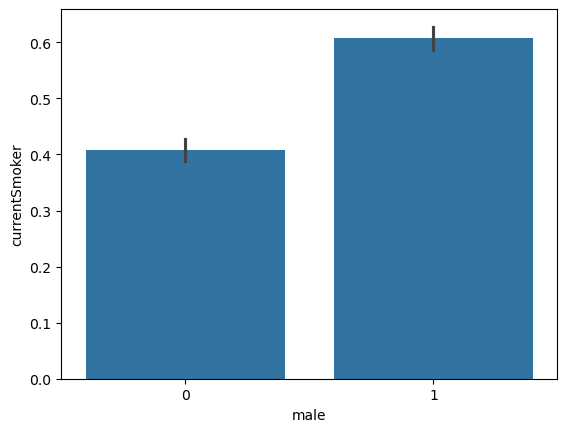

In [107]:
sns.barplot(x="male",y="currentSmoker",data=df)

<Axes: xlabel='male', ylabel='cigsPerDay'>

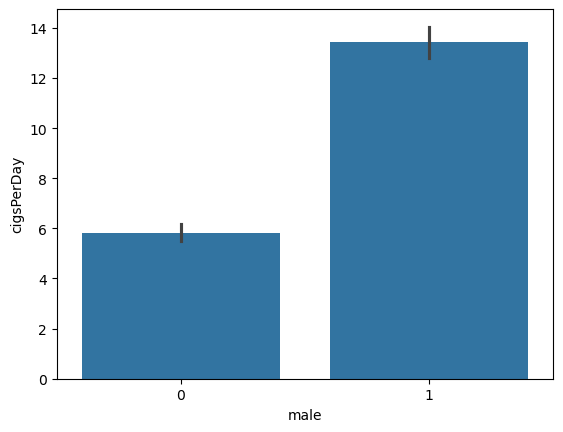

In [111]:
sns.barplot(x="male",y="cigsPerDay",data=df)

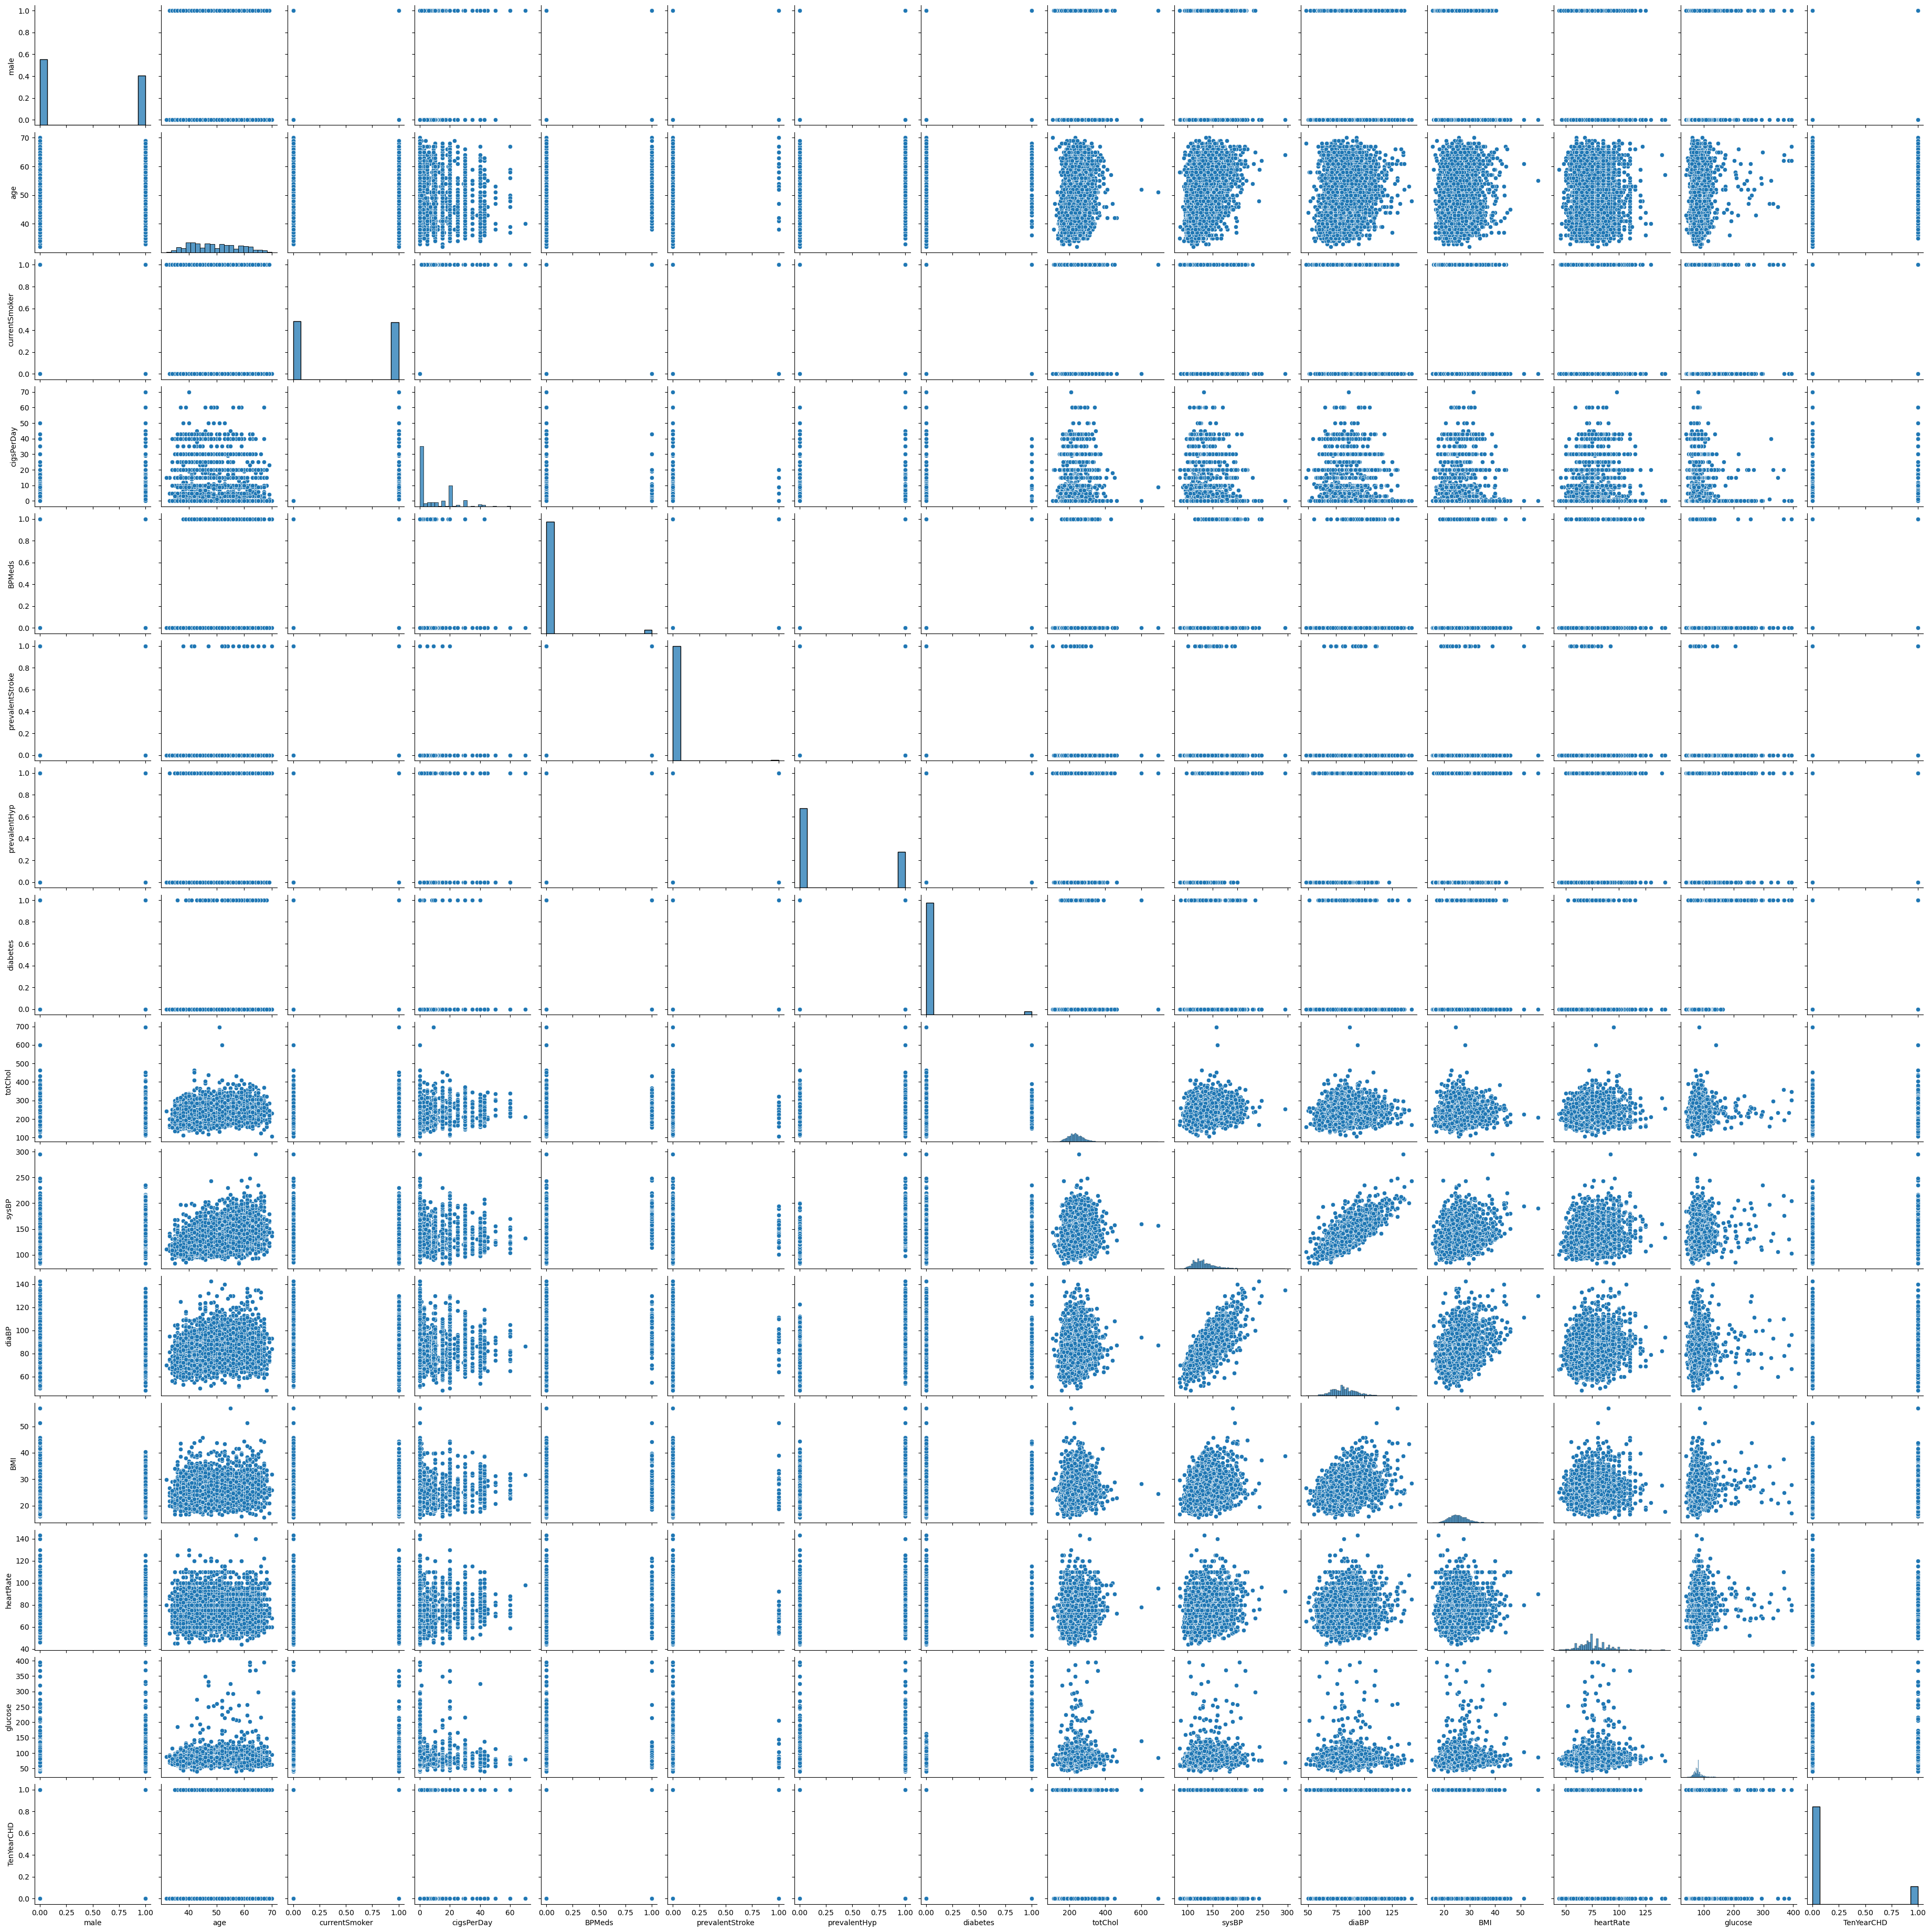

In [115]:
sns.pairplot(data=df)

In [55]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [57]:
x = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
x

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [59]:
y = df["TenYearCHD"]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

# Train Test Split Data

In [63]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=10)

# Model : Logistic Regression

In [66]:
model1 = LogisticRegression()

In [68]:
model1.fit(x_train , y_train)

C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
print("Test accuracy Score :- ",round(model1.score(x_test,y_test)*100,2),"%") 
print("Train accuracy Score :- ",round(model1.score(x_train,y_train)*100,2),"%")

Test accuracy Score :-  85.38 %
Train accuracy Score :-  85.06 %


In [72]:
y_pred = model1.predict(x_test)

In [74]:
ps = precision_score(y_test , y_pred)
rs = recall_score(y_test , y_pred)
f1 = f1_score(y_pred,y_test)

print(f"""
            Logistic Regression - precision_score :- {ps}
            Logistic Regression - recall_score    :- {rs}
            Logistic Regression - f1_score       :- {f1}
          """)


            Logistic Regression - precision_score :- 0.5555555555555556
            Logistic Regression - recall_score    :- 0.05319148936170213
            Logistic Regression - f1_score       :- 0.0970873786407767
          


# Model : K-Neighbors Classifier

In [77]:
model2 = KNeighborsClassifier(n_neighbors=18)

In [79]:
model2.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=18)

In [81]:
print("Test accuracy Score :- ",round(model2.score(x_test,y_test)*100,2),"%") 
print("Train accuracy Score :- ",round(model2.score(x_train,y_train)*100,2),"%")

Test accuracy Score :-  85.06 %
Train accuracy Score :-  85.03 %


In [82]:
y_pred2 = model2.predict(x_test)

In [83]:
ps = precision_score(y_test , y_pred2)
rs = recall_score(y_test , y_pred2)
f1 = f1_score(y_pred2,y_test)

print(f"""
            KNN Classifier - precision_score :- {ps}
            KNN Classifier - recall_score    :- {rs}
            KNN Classifier - f1_score        :- {f1}
          """)


            KNN Classifier - precision_score :- 0.4
            KNN Classifier - recall_score    :- 0.02127659574468085
            KNN Classifier - f1_score        :- 0.04040404040404041
          


# Model : Random_Forest Classifier

In [88]:
model3 = RandomForestClassifier()

In [90]:
model3.fit(x_train, y_train)

RandomForestClassifier()

In [92]:
print("Test accuracy Score :- ",round(model3.score(x_test,y_test)*100,2),"%") 

Test accuracy Score :-  84.91 %


In [94]:
y_pred3 = model3.predict(x_test)

In [96]:
ps = precision_score(y_test , y_pred3)
rs = recall_score(y_test , y_pred3)
f1 = f1_score(y_pred3,y_test)

print(f"""
            Random Forest Classifier - precision_score :- {ps}
            Random Forest Classifier - recall_score    :- {rs}
            Random Forest Classifier - f1_score        :- {f1}
          """)


            Random Forest Classifier - precision_score :- 0.4375
            Random Forest Classifier - recall_score    :- 0.07446808510638298
            Random Forest Classifier - f1_score        :- 0.12727272727272726
          


# Perform the comparative analysis between the models and select the best model. 
## Mention the reason why you are selecting the model.

 ##### Random Forest Classifier is the best-performing model among those evaluated, 
##### based on the F1 score, indicating it provides a better balance between precision and recall.

# Save the model

In [258]:
import joblib

joblib.dump(model3, r"C:\\Users\\Anish Avasthi\\Desktop\\Sunstone\\random_for_heart.pkl")

['C:\\\\Users\\\\Anish Avasthi\\\\Desktop\\\\Sunstone\\\\random_for_heart.pkl']